# Multiple Linear Regression on Utrecht Housing Dataset

### Definition:
Multiple linear regression (MLR), also known simply as multiple regression, is a statistical technique that uses several explanatory variables to predict the outcome of a response variable. The goal of multiple linear regression is to model the linear relationship between the explanatory (independent) variables and response (dependent) variables. In essence, multiple regression is the extension of ordinary least-squares (OLS) regression because it involves more than one explanatory variable.

source: https://www.investopedia.com/

#### The objective is to:
* Implement Multiple Linear Regression using Scikit Learn on the Utrecht Housing Dataset
* Use Multicollinearity function to to determine which independent features should be used in the process
* Create a model which will be trained and tested
* Evaluate the Model to know its efficiency in making predictions

#### Processes required to achieve the objective

* Data Understanding
* Import necessary libraries
* Data Importation using Pandas to create easily readable dataframe
* Exploration of Data - Checking general data overview using 'describe' amd 'info' 
* Data cleaning if necessary by removing redundant or empty data
* Data Visualisation (checking correlation) using matplotlib to create various plots 
* Use Multicollinearity function to help select features for the Model
* using randomness to partition the data into 80% and 20%
* using 80% of the data for training and the remaining 20% for testing
* Use plots to see the distribution of trained data and ascertain that data training has been achieved
* use sklearn to call out the Linear Model
* define our dependent and independent variables for the training model
* check the coefficients of the model
* plot the output of the training model using a specific feature to check if training was succesful
* Evaluate the model
* Remarks about observation 

# Understanding the Data

The order of elements is id,zipcode,lot-len,lot-width,lot-area,house-area,garden-size,balcony,x-coor,y-coor,buildyear,bathrooms,taxvalue,retailvalue,energy-eff,monument.

**Input columns
**
The meaning of each column is as follows:

id: a number between 0 and 100000 that is a unique identifier for each house. Do not use this in your algorithms

zipcode: Each house has a zipcode corresponding to the area the house is in. The zipcode can be an indicator of build year or other properties. There are four different zip codes in use: 3520, 3525, 3525, 3800.

lot-len: the length in meters of the plot of land the house is built on. Each house is built on a square plot of land. It can be anything from 5.0 to 100.0 meters

lot-width: the width in meters of the plot of land the house is built on. It can be anything from 5.0 to 100.0 meters

lot-area: the total area of the plot of land the house is built on. You can probably compute this from lot-len and lot-width.
house-area. The living area of the house in square meters. 30.0 square meters is a tiny house, 200.0 square meters would be a mansion.

garden-size: The size of the garden in square meters. Many people want to have a large garden.
balcony: the number of balconies the house has. Common values are 0,1, or 3 balconies

x-coor: the x-coordinate describing the location of the house. It is an integer value between 2000 and 3000

y-coor: the y-coordinate describing the location of the house. It is an integer value between 5000 and 6000

buildyear. The year that the house was built. Some of the oldest houses are from 1100,, but most houses were built in the 2oth and 21st century.

bathrooms: Most houses in Utrecht have one bathroom. Some houses have 2 or 3 bathrooms

**Output/target values:
**
taxvalue: The taxvalue of the house is a number between 50.000 and 1.000.000 that is a conservative value of the house. It is estimated (often based on real housing data) by the government to determine taxes. In a calm market, it is close to but often slightly lower than the retail value. It is rounded to the nearest 100 euros.

retailvalue: the market value of a house. It is a number between 50.000 and 1.000.000. It is rounded to the nearest 1000 euros.

energy-eff: This value is either 0 or 1. If it is 1 it means that the house is energy efficient. This is important for certain climate goals of the city of Utrecht

monument: Some houses in Utrecht, especially older houses, have monumental value since they have a unique architectural design. People have been trying to predict if this is the case from other data, since it is timeconsuming to visit each house and inspect the architecture

source: https://www.kaggle.com/datasets/ictinstitute/utrecht-housing-dataset

### Libraries Import

In [1]:
import pandas as pd # for reading data
import numpy as np # for doing vital mathematical operations
import matplotlib.pyplot as plt # for plotting graphs

### Data Import

In [2]:
df = pd.read_csv('utrechthousing.csv')

In [3]:
df.head()

,id,zipcode,lot-len,lot-width,lot-area,house-area,garden-size,balcony,x-coor,y-coor,buildyear,bathrooms,taxvalue,retailvalue,energy-eff,monument
0,100426,3528,11.1,5.0,55.5,112.50,10.5,2,2112,5113,1932,1,494000,670000,0,1
1,100871,3528,13.6,5.0,68.0,112.50,8.0,0,2355,5218,1945,1,504000,675000,0,1
2,100936,3800,16.6,6.7,111.2,150.75,44.2,2,2656,5200,1946,1,692000,869000,0,1
3,100970,3800,18.6,6.0,111.6,108.00,39.6,2,2856,5201,1946,1,521000,628000,0,1
4,101191,3800,19.6,6.0,117.6,108.00,45.6,1,2962,5266,1950,1,526000,610000,0,1


### Data Exploration

In [4]:
df.describe()

,id,zipcode,lot-len,lot-width,lot-area,house-area,garden-size,balcony,x-coor,y-coor,buildyear,bathrooms,taxvalue,retailvalue,energy-eff,monument
count,2000.000000,2000.000000,2000.000000,2000.00000,2000.000000,2000.000000,2000.00000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2.000000e+03,2.000000e+03,2000.000000,2000.000000
mean,550159.413500,3609.088000,14.848500,7.75520,115.236600,139.884750,35.45365,1.152500,2484.360500,5484.435000,1969.044500,1.327000,6.517150e+05,7.910245e+05,0.501500,0.510000
std,257599.198061,131.206058,2.883188,1.69576,34.370459,41.745307,23.86576,0.698203,288.399892,288.538538,26.358109,0.469235,1.829273e+05,2.109795e+05,0.500123,0.500025
min,100426.000000,3500.000000,10.000000,5.00000,50.500000,67.500000,5.00000,0.000000,2000.000000,5000.000000,1920.000000,1.000000,3.100000e+05,4.190000e+05,0.000000,0.000000
25%,330326.250000,3525.000000,12.425000,6.47500,89.100000,110.700000,13.87500,1.000000,2242.250000,5242.250000,1947.000000,1.000000,5.210000e+05,6.317500e+05,0.000000,0.000000
50%,556845.500000,3528.000000,14.850000,7.65000,109.950000,135.000000,32.00000,1.000000,2484.500000,5484.500000,1969.000000,1.000000,6.330000e+05,7.660000e+05,1.000000,1.000000
75%,763794.250000,3800.000000,17.275000,9.10000,138.325000,166.500000,52.55000,2.000000,2726.750000,5726.750000,1992.000000,2.000000,7.592500e+05,9.072500e+05,1.000000,1.000000
max,993963.000000,3800.000000,19.700000,11.00000,215.600000,247.500000,115.50000,2.000000,2969.000000,5969.000000,2018.000000,2.000000,1.162000e+06,1.428000e+06,1.000000,1.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           2000 non-null   int64  
 1   zipcode      2000 non-null   int64  
 2   lot-len      2000 non-null   float64
 3   lot-width    2000 non-null   float64
 4   lot-area     2000 non-null   float64
 5   house-area   2000 non-null   float64
 6   garden-size  2000 non-null   float64
 7   balcony      2000 non-null   int64  
 8   x-coor       2000 non-null   int64  
 9   y-coor       2000 non-null   int64  
 10  buildyear    2000 non-null   int64  
 11  bathrooms    2000 non-null   int64  
 12  taxvalue     2000 non-null   int64  
 13  retailvalue  2000 non-null   int64  
 14  energy-eff   2000 non-null   int64  
 15  monument     2000 non-null   int64  
dtypes: float64(5), int64(11)
memory usage: 250.1 KB


In [6]:
df.isnull().values.any()

False

### Initial Feature Selection using correlation

In [7]:
df.corr()['retailvalue']

id             0.047345
zipcode        0.029196
lot-len       -0.025658
lot-width      0.741042
lot-area       0.533851
house-area     0.969273
garden-size    0.227426
balcony        0.215810
x-coor        -0.025412
y-coor         0.127973
buildyear      0.124614
bathrooms      0.370401
taxvalue       0.965050
retailvalue    1.000000
energy-eff    -0.026770
monument       0.329109
Name: retailvalue, dtype: float64

* the following had significant influence on the dependent value: lot-widdth, lot-area, house-area, taxvalue,  bathrooms

In [24]:
cdf = df[['lot-width','lot-area','house-area','taxvalue','bathrooms','retailvalue']]

In [25]:
cdf.head(9)

,lot-width,lot-area,house-area,taxvalue,bathrooms,retailvalue
0,5.0,55.5,112.50,494000,1,670000
1,5.0,68.0,112.50,504000,1,675000
2,6.7,111.2,150.75,692000,1,869000
3,6.0,111.6,108.00,521000,1,628000
4,6.0,117.6,108.00,526000,1,610000
5,9.3,132.1,125.55,608000,1,818000
6,10.2,170.3,229.50,1054000,1,1297000
7,9.5,171.0,128.25,650000,2,792000
8,9.3,98.6,167.40,748000,1,947000


## Data Preprocessing / Data Cleaning / Data Screening

* One of the main things to do when working on Mching Learning is to get the data ready for the process.
* In this case our data is clean and we dont have to do a lot in the preprocessing stage

# Data Visualisation

### Plots

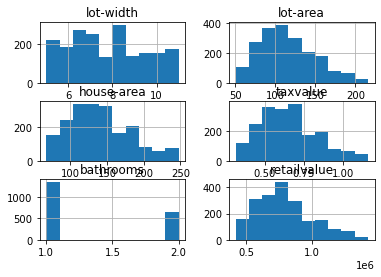

In [26]:
cdf.hist()
plt.show()

Text(0, 0.5, 'retailvalue')

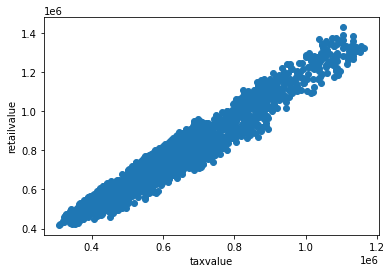

In [27]:
plt.scatter(cdf.taxvalue, cdf.retailvalue)

# adding x and y lables to the plot
plt.xlabel("taxvalue")
plt.ylabel("retailvalue")


# Feature Selection - final: Defining elements for our model

* its important to know what is our dependent variable and what is our independent variable
* profit is the yardstick that defines a company's success so we use profit as dependent and anoother parameter as independent

In [29]:
import statsmodels.api as sm

In [30]:
X =cdf[['lot-width', 'lot-area', 'house-area', 'taxvalue', 'bathrooms']]
y =cdf[['retailvalue']]

In [31]:
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()

C:\Users\user\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [32]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            retailvalue   R-squared:                       0.946
Model:                            OLS   Adj. R-squared:                  0.946
Method:                 Least Squares   F-statistic:                     7048.
Date:                Sun, 17 Sep 2023   Prob (F-statistic):               0.00
Time:                        18:47:52   Log-Likelihood:                -24429.
No. Observations:                2000   AIC:                         4.887e+04
Df Residuals:                    1994   BIC:                         4.890e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       5.616e+04   5438.058     10.328      0.000    4.55e+04    6.68e+04
lot-width   1.742e+04   1164.576     14.955      0.000    1.51e+04    1.97e+04
lot-area   -2372.2665   3021.537     -0.785      0.432   -8297.966    3553.433
house-area -6175.7954   1.51e+04     -0.409      0.683   -3.58e+04    2.35e+04
taxvalue       2.6729      3.777      0.708      0.479      -4.735      10.080
bathrooms  -3672.9828   2530.382     -1.452      0.147   -8635.453    1289.487
==============================================================================
Omnibus:                      172.700   Durbin-Watson:                   0.717
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               99.508
Skew:                          -0.405   Prob(JB):                     2.47e-22
Kurtosis:                       2.266   Cond. No.                     9.54e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.54e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [33]:
X =cdf[['lot-width', 'lot-area', 'house-area', 'taxvalue']]
y =cdf[['retailvalue']]

In [34]:
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()

C:\Users\user\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [35]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            retailvalue   R-squared:                       0.946
Model:                            OLS   Adj. R-squared:                  0.946
Method:                 Least Squares   F-statistic:                     8804.
Date:                Sun, 17 Sep 2023   Prob (F-statistic):               0.00
Time:                        18:47:53   Log-Likelihood:                -24430.
No. Observations:                2000   AIC:                         4.887e+04
Df Residuals:                    1995   BIC:                         4.890e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       5.353e+04   5127.057     10.440      0.000    4.35e+04    6.36e+04
lot-width   1.742e+04   1164.893     14.956      0.000    1.51e+04    1.97e+04
lot-area   -2430.1039   3022.112     -0.804      0.421   -8356.930    3496.723
house-area -6480.7582   1.51e+04     -0.429      0.668   -3.61e+04    2.32e+04
taxvalue       2.7450      3.778      0.727      0.468      -4.664      10.154
==============================================================================
Omnibus:                      172.504   Durbin-Watson:                   0.714
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               99.917
Skew:                          -0.407   Prob(JB):                     2.01e-22
Kurtosis:                       2.267   Cond. No.                     9.54e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.54e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [36]:
X =cdf[['lot-width', 'lot-area', 'taxvalue']]
y =cdf[['retailvalue']]

In [37]:
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()

C:\Users\user\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [38]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            retailvalue   R-squared:                       0.946
Model:                            OLS   Adj. R-squared:                  0.946
Method:                 Least Squares   F-statistic:                 1.174e+04
Date:                Sun, 17 Sep 2023   Prob (F-statistic):               0.00
Time:                        18:47:53   Log-Likelihood:                -24431.
No. Observations:                2000   AIC:                         4.887e+04
Df Residuals:                    1996   BIC:                         4.889e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       5.345e+04   5123.033     10.434      0.000    4.34e+04    6.35e+04
lot-width   1.743e+04   1164.295     14.974      0.000    1.52e+04    1.97e+04
lot-area   -1134.1309     48.283    -23.489      0.000   -1228.821   -1039.441
taxvalue       1.1248      0.009    121.484      0.000       1.107       1.143
==============================================================================
Omnibus:                      171.197   Durbin-Watson:                   0.713
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               99.826
Skew:                          -0.408   Prob(JB):                     2.10e-22
Kurtosis:                       2.270   Cond. No.                     3.20e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.2e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [50]:
# to check further we plot the variables against each other 

import matplotlib.pyplot as plb
X.iloc[:,1:].corr()

,lot-width,lot-area,taxvalue
lot-width,1.000000,0.745588,0.757407
lot-area,0.745588,1.000000,0.629712
taxvalue,0.757407,0.629712,1.000000


* The high values shows there is multicollinearity issue with these features in the data. 
* it means some features can be dropped and it wont affect the model. 
* also the around 70% correlation with eachother is an indication we can use each of them to replace the other
* we dropped house-area

In [39]:
new_df = cdf[['lot-width','lot-area','taxvalue','retailvalue']]

# Train & Test Split of Data

In [40]:
msk = np.random.rand(len(df)) < 0.8
train = new_df[msk]
test = new_df[~msk]

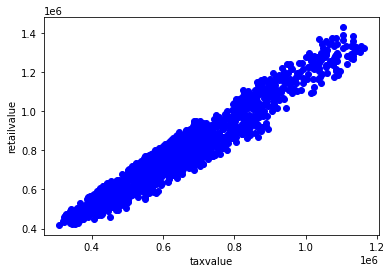

In [41]:
plt.scatter(train.taxvalue, train.retailvalue,  color='blue')
plt.xlabel("taxvalue")
plt.ylabel("retailvalue")
plt.show()

# Model Creation

In [42]:
from sklearn import linear_model
regr = linear_model.LinearRegression()

In [43]:
x = np.asanyarray(train[['lot-width','lot-area','taxvalue']])
y = np.asanyarray(train[['retailvalue']])

# Fit the Model

In [44]:
regr.fit (x, y)

LinearRegression()

In [45]:
print ('Coefficients: ', regr.coef_)

Coefficients:  [[ 1.72054313e+04 -1.11011631e+03  1.12237320e+00]]


# Model Evaluation/Prediction

## Ordinary Least Squares (OLS)

OLS is a method for estimating the unknown parameters in a linear regression model. OLS chooses the parameters of a linear function of a set of explanatory variables by minimizing the sum of the squares of the differences between the target dependent variable and those predicted by the linear function. In other words, it tries to minimizes the sum of squared errors (SSE) or mean squared error (MSE) between the target variable (y) and our predicted output ( 
^
y
 ) over all samples in the dataset.

OLS can find the best parameters using of the following methods:

* Solving the model parameters analytically using closed-form equations
* Using an optimization algorithm (Gradient Descent, Stochastic Gradient Descent, Newton’s Method, etc.)

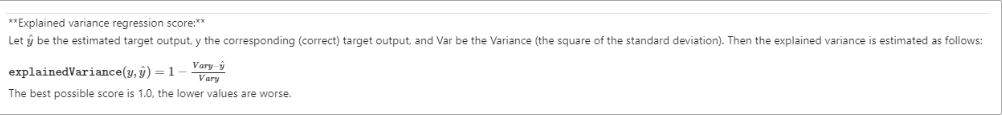

In [46]:
y_hat= regr.predict(test[['lot-width','lot-area','taxvalue']])

In [47]:
x = np.asanyarray(test[['lot-width','lot-area','taxvalue']])
y = np.asanyarray(test[['retailvalue']])

In [48]:
print("Residual sum of squares: %.2f"
      % np.mean((y_hat - y) ** 2))

Residual sum of squares: 2402295762.77


In [49]:
print('Variance score: %.2f' % regr.score(x, y))

Variance score: 0.94


### Remarks

* our Variance score 0.94 is very high meaning we can rely on our model to make predictions

### Replacing lot-area with house-area to see the prediction results

In [52]:
try_df = cdf[['lot-width','house-area','taxvalue','retailvalue']]

In [53]:
msk = np.random.rand(len(df)) < 0.8
train = try_df[msk]
test = try_df[~msk]

In [54]:
x = np.asanyarray(train[['lot-width','house-area','taxvalue']])
y = np.asanyarray(train[['retailvalue']])

In [55]:
regr.fit (x, y)

LinearRegression()

In [56]:
print ('Coefficients: ', regr.coef_)

Coefficients:  [[ 1.75035373e+04  5.50917702e+03 -2.60373025e-01]]


In [57]:
y_hat= regr.predict(test[['lot-width','house-area','taxvalue']])

In [58]:
x = np.asanyarray(test[['lot-width','house-area','taxvalue']])
y = np.asanyarray(test[['retailvalue']])

In [59]:
print('Variance score: %.2f' % regr.score(x, y))

Variance score: 0.95


### Further Remarks

* Further work can be done on the data by including more data in the model or using other unused data to compare results
* Some features have very high data values while others are low, some standardisation to make them all between 0 and 1 could also be done to check compare the results